https://www.youtube.com/watch?v=PlmFUQCL_ok

https://github.com/libigl/libigl-tutorial-data

https://www.karlsims.com/rd.html

https://onedrive.live.com/?cid=D593C887747D2172&id=D593C887747D2172%2126941&parId=D593C887747D2172%2126801&o=OneUp

In [215]:
import sys
import numpy as np
import meshplot as mp
import scipy.sparse as sp
import matplotlib.pyplot as plt

from src.mesh import Mesh
from src.solver import HeatEquation, TuringPattern, get_cot_laplacian
from utils.animate import visualize_mesh, animate_solution, scalar_field

In [216]:
# Mesh path
mesh_path = './datasets/cow.obj'
# Get the mesh
mesh = Mesh()
mesh.load_from_file(mesh_path)
# Informazioni
print(f"Mesh caricata. vertici: {mesh.num_vertices}, facce: {mesh.num_faces}")

visualize_mesh(mesh, faces=False, boundary=False)

Mesh caricata. vertici: 35947, facce: 69451


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

# Turing pattern

\begin{cases}
    (\partial_t + D_1\Delta)u = -uv^2 + f(1-u)\\
    (\partial_t + D_2\Delta)v = uv^2 - (f+k)v
\end{cases}

In [231]:
x = mesh.vertices[:,0]
y = mesh.vertices[:,1]
z = mesh.vertices[:,2]

initial_u = np.ones(mesh.num_vertices)
initial_v = np.zeros(mesh.num_vertices)
for i in range(50):
    id = np.random.randint(0,mesh.num_vertices)
    x0 = mesh.vertices[id,0]
    y0 = mesh.vertices[id,1]
    z0 = mesh.vertices[id,2]
    mask = (x-x0)**2+(y-y0)**2+(z-z0)**2<=0.00001
    initial_u[mask] = 0.5
    initial_v[mask] = 0.75

scalar_field(mesh, initial_u)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

In [218]:
laplacian = get_cot_laplacian(mesh)
print(laplacian.min(), laplacian.max())

-8.16143133060768 5.303862999999978


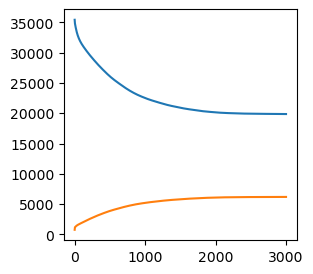

In [232]:
#Du, Dv, f, k = 0.16, 0.08, 0.054, 0.055
#Du, Dv, f, k = 0.16, 0.08, 0.024, 0.061
Du, Dv, f, k = 0.16, 0.08, 0.037, 0.06

dt = 0.75
nt = 3000

times = dt*np.arange(0,nt)
solver = TuringPattern(mesh, times, Du, Dv, f, k)

u, v = solver.solve(initial_u, initial_v, mesh.get_boundary())

plt.figure(figsize=(3,3))
plt.plot(u.sum(axis=1))
plt.plot(v.sum(axis=1))
plt.show()

In [233]:
animate_solution(u[::10], mesh, pause_time=10, cmap='grey')

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016840…

https://pmneila.github.io/jsexp/grayscott/

In [228]:
import pyvista as pv

In [234]:
v = mesh.vertices
f = np.hstack((np.full((mesh.faces.shape[0], 1), 3), mesh.faces))
visual_mesh = pv.PolyData(v,f)

In [236]:
p = pv.Plotter(notebook=False, off_screen=True)
visual_mesh["scalars"] = u[0]
mesh_actor = p.add_mesh(visual_mesh, show_scalar_bar=False, cmap='grey')

p.camera_position = (
    visual_mesh.center - np.array([0, 0, 1.5*visual_mesh.length]),
    visual_mesh.center,
    (0, 1, 0)
)

p.open_gif('gs2.gif')
p.render()

tot = u[::40].shape[0]

for i, frame in enumerate(u[::40]):
    visual_mesh['scalars'] = frame
    angle = np.pi/2 + 1/4*np.pi*i/50
    p.camera_position = (
        visual_mesh.center - np.array([-np.sin(angle)*1.5*visual_mesh.length, -angle/15, np.cos(angle)*1.5*visual_mesh.length]),
        visual_mesh.center,
        (0, 1, 0)
    )
    p.render()
    p.write_frame()
    print(i/tot*100,end="\r")

p.close()

https://www.sciencedirect.com/science/article/pii/S0377042707000726